# Source site
#https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

Notes 

use Normal method of training and testing instead of this training\

and testing method(from maching learning tutorials of sklearn and

machine learning python for data science.)

at last mention credits if required. 


## **Table of Contents**
- [**Introduction**](#intro)
- [**Defining Loan**](#def)
- [**Loan Disbursement Process **](#process) 
- [**Importing Libraries**](#Implb)
- [**Importing Data**](#Impda)
- [**Data Exploration/Analysis**](#Analysis)
- [**Data Preprocessing**](#Preprocessing)
    - [Filling Missing values](#Missing)
    - [Converting features(Categorical) to Numerical Values](#Converting)
- [**Building Machine Learning Models**](#Models)
    - [Logistic Regression ](#LR)
    - [Decisison Tree Model](#dt)
    - [Random Forest](#rf)
    - [Neural Network](#nn)
    - [Gradient Boosting](#gb)
    - [K-Nearest Neighbors](#knn)
    - [Support Vector Machine Classifier](#svm)
    - [Naive Bayes](#gauss)

    
- [**Further Evaluation**](#Evaluation)
- [**Interpretating the output**](#Output)
- [**Conclusion**](#Conclusion)





<a id='intro'></a>
### Introduction 

In this project I will go through the complete process of building machine learning model based on the Loan Prediction dataset. Where I am going to use different information available of differnet applicants regarding there background as features such as Income of applicant, Loan amount, Property area to be used as mortage, Loan amount, martial status, Sex, Education level etc. So in this problem we have to predict whether a applicant will receive loan or not.   



<a id='def'></a>
### Defining Loan
In finance, a loan is the lending of money from one individual, organization or entity to another individual, organization or entity. A loan is a debt provided by an organization or individual to another entity at an interest rate, and evidenced by a promissory note which specifies, among other things, the principal amount of money borrowed, the interest rate the lender is charging, and date of repayment. A loan entails the reallocation of the subject asset(s) for a period of time, between the lender and the borrower.(Wikipedia)

<a id = 'process'></a>
### Loan Disbursement Process 

Now days banks want to automate the process of detemining whether a loan should be given to an individual or not. Since deciding whether a person should receive a loan or not is dependent on many factors such his/her financial background, Amount of loan, past trasactions, Educational background etc. Deciding loan disburment based upon these factors can be a time consuming process and when banks are having huge no. of customers manually doing this can tough process in todays digital world.

![Loan](http://www.corporateprojects.in/wp-content/uploads/2016/03/loan.jpg)

<a id = 'Implb'></a>
### Importing Libraries

In [3]:

#linear algebra functions
import numpy as np

# data analysis
import pandas as pd



#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook
%pylab inline

#Data Munging
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler



# machine learning
#Import models from scikit learn module:
import sklearn as sk
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC 
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


Populating the interactive namespace from numpy and matplotlib


<a id = 'Impda'></a>
### Importing Data

In [4]:
df = pd.read_csv("train.csv")#Reading the dataset in a dataframe using Pandas
train_df = pd.read_csv("train.csv")#Reading the dataset in a dataframe using Pandas
test_df = pd.read_csv("test.csv")
combine = [train_df, test_df]

<a id = 'analysis'></a>
### **Data Exploration/Analysis**

In [5]:
print(train_df.columns.values)
train_df.head()

['Loan_ID' 'Gender' 'Married' 'Dependents' 'Education' 'Self_Employed'
 'ApplicantIncome' 'CoapplicantIncome' 'LoanAmount' 'Loan_Amount_Term'
 'Credit_History' 'Property_Area' 'Loan_Status']


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
train_df.apply(lambda x: sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

##### *The training-set data has 614 entries and 12 features and Loan status*
Out of these there are 4 float values column, one integer value and 8 object values

**Description of features**
- **Loan_ID** :  Unique ID for Loan and no missing values. 


- **Gender** :   Gender/Sex of applicant and (614 - 601)13 missing values.


- **Married** :   Marital status and 3 missing values.


- **Dependents** :    No. of people dependent on applicant and 15 missing values.


- **Education** :      Education level of applicant(here we will see graduate or non graduate).


- **Self_Employed** :     Kind of employment the applicant have, whether the person is self employed or not and it has  (614-584) 30 missing values.


- **ApplicantIncome** :      Income of applicant.


- **CoapplicantIncome** :       Income of co-applicant of loan.


- **LoanAmount** :      Amount of loan that applicant is asking for and (614 -592)22 missing values.


- **Loan_Amount_Term** :      Term(Time period) for loan amount and (614-600)14 missing values.


- **Credit_History** :       Credit history is a record of a borrower's responsible repayment of debts here we are looking whether applicant have credit history or not and   (614-564)50 missing values.


- **Property_Area**:      Area of property (Semiurban\ Urban \ Rural) 


- **Loan_Status**:          Status of loan approved or not(Targeted value).

###### Summary of Numerical variables

In [8]:
train_df.describe() 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


###### From above we can see that
- 84.2% people have credit history.
- Minimum amount of loan is 9.

Analysing distribution 

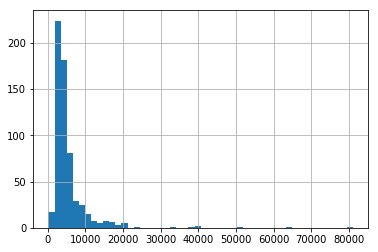

In [9]:
train_df['ApplicantIncome'].hist(bins=50)

In [ ]:
df.boxplot(column='ApplicantIncome', whis = 'range')

In [ ]:
train_df.boxplot(column='ApplicantIncome', by = 'Education')

- This shows many of **Graduate** applicants have higher Income than **Non-Graduate** applicants  

In [ ]:
train_df.boxplot(column='ApplicantIncome', by = 'Gender')

- As from above it can be seen that **Male** applicants have higher average salary than **Female** Candidates.

In [ ]:
train_df['CoapplicantIncome'].hist(bins=50)

In [ ]:
 train_df['LoanAmount'].hist(bins=50)

In [ ]:
train_df.boxplot(column='LoanAmount')

It have some missing values and also some extreme values.

In [ ]:
train_df['Loan_Amount_Term'].hist(bins=10)

In [ ]:
train_df['Credit_History'].value_counts()

###### Now looking at non numerical values and there variations.

In [ ]:
train_df.describe(include=['O'])

###### Now we can interfere from above few important things.
- Most people applied for loan are male.
- Most of people are married and have graduated.
- Loan of most people are approved. 
-

In [ ]:
train_df['Property_Area'].value_counts()

In [ ]:
temp1 = train_df['Credit_History'].value_counts(ascending=True)
temp2 = train_df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:') 
print(temp1)

print('\nProbility of getting loan for each Credit History class:') 
print(temp2)

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

In [ ]:
temp3 = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

<br>
## Data Munging 

Now lets find the columns having missing values.

In [ ]:
train_df.apply(lambda x: sum(x.isnull()),axis=0)

### Applying imputation techniques take help of Kaggle(https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding) and https://www.kaggle.com/dansbecker/handling-missing-values

## Filling Missing values

In [ ]:
train_df.info()

In [ ]:
# def get_mae(X, y):
#     # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
#     return -1 * cross_val_score(RandomForestRegressor(50), 
#                                 X, y, 
#                                 scoring = 'neg_mean_absolute_error').mean()

# predictors_without_categoricals = train_predictors.select_dtypes(exclude=['object'])

# mae_without_categoricals = get_mae(predictors_without_categoricals, target)

# mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, target)
# print('Mean Absolute Error when Dropping Categoricals: ' + str(int(mae_without_categoricals)))
# print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))

Applying Imputation for Numerical values. this uses scikit learn which we will not use here as are doing data munging and imputation is normally done when we don't want to go for data munging by self and fill the columns with using using imputer function wich take automatically care of all the things. In data munging we our self decide where to fill NaN by mean values or by median or categoraical values that can increse chance of success.



In [ ]:
# make copy to avoid changing original data (when Imputing)
# train_df = train_df.copy()

# # make new columns indicating what will be imputed
# cols_with_missing = (col for col in train_df.columns 
#                                  if train_df[col].isnull().any())
# for col in cols_with_missing:
#     train_df[col + '_was_missing'] = train_df[col].isnull()

# # Imputation
# my_imputer = Imputer()
# train_df = my_imputer.fit_transform(train_df)

In [ ]:
train_df.info()

In [ ]:
 #df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [ ]:
train_df['Self_Employed'].fillna('No',inplace=True)
test_df['Self_Employed'].fillna('No',inplace=True)

In [ ]:
table = train_df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
train_df['LoanAmount'].fillna(train_df[train_df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

Now for test data

In [ ]:
table = test_df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
test_df['LoanAmount'].fillna(test_df[test_df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [ ]:
# df['Loan_Amount_Term'].fillna(df[df['Loan_Amount_Term'].isnull()].apply(fage, axis=1), inplace=True)
# df['Credit_History'].fillna(df[df['Credit_History'].isnull()].apply(fage, axis=1), inplace=True)
#filling Missing values of Loan amount term and crdit History that was not done Vidhya analytics 
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean(), inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mean(), inplace=True)
#Loan_Amount_Term, Credit_History
train_df.head()
 #Loan_Amount_Term, Credit_History 


For Test Data

In [ ]:
#filling Missing values of Loan amount term and crdit History that was not done Vidhya analytics 
test_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean(), inplace=True)
test_df['Credit_History'].fillna(train_df['Credit_History'].mean(), inplace=True)
#Loan_Amount_Term, Credit_History
test_df.head()
 #Loan_Amount_Term, Credit_History 

In [ ]:
train_df.apply(lambda x: sum(x.isnull()),axis=0)

In [ ]:
test_df.apply(lambda x: sum(x.isnull()),axis=0)

In [ ]:
train_df.info()

In [ ]:
test_df.info()

In [ ]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean(), inplace=True)


In [ ]:
test_df['LoanAmount'].fillna(test_df['LoanAmount'].mean(), inplace=True)

## How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

In [ ]:
train_df['LoanAmount_log'] = np.log(train_df['LoanAmount'])
test_df['LoanAmount_log'] = np.log(test_df['LoanAmount'])
train_df['LoanAmount_log'].hist(bins=20)

In [ ]:
train_df['TotalIncome'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
train_df['TotalIncome_log'] = np.log(train_df['TotalIncome'])
train_df['LoanAmount_log'].hist(bins=20) 

#For test set
test_df['TotalIncome'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']
test_df['TotalIncome_log'] = np.log(test_df['TotalIncome'])


# Applying One-Hot encoding for dealing with categorical data and converting them to numerical values.

# For using it take care of things told in Kaggle
train_df = pd.get_dummies(train_df)

In [ ]:
train_df.head()

In [ ]:
train_df.info()

In [ ]:
#train_df = pd.get_dummies(train_df[])

In [ ]:
train_df.head()

In [ ]:
#Train Data
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in var_mod:
    train_df[i] = pd.get_dummies(df[i])
    
#Test Data
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in var_mod:
    test_df[i] = pd.get_dummies(df[i])
    
train_df.dtypes 

In [ ]:
train_df.head()

In [ ]:
train_df.apply(lambda x: sum(x.isnull()),axis=0)

In [ ]:
test_df.apply(lambda x: sum(x.isnull()),axis=0)

In [ ]:
train_df.info()

In [ ]:
train_df.info()

### Data analysis by converting all values to Numerical data

In [ ]:

train_df[['Property_Area', 'Loan_Status']].groupby(['Loan_Status'], as_index=False).mean()

In [ ]:

train_df[['Property_Area', 'Loan_Status']].groupby(['Loan_Status'], as_index=False).mean()

In [ ]:
#Splitting data into train and test set.
train_df, test_x = train_test_split(train_df, train_size = 0.8, random_state = 1)
test_x.head()

In [ ]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, test_x, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print(("Accuracy : %s" % "{0:.3%}").format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print(("Cross-Validation Score : %s" % "{0:.3%}").format(np.mean(error)))
    
  #Final evaluation test_set  
  test_log = round(model.score(test_x[predictor_var], test_x[outcome_var]) * 100, 2)
  print("Accuracy on test set: ",test_log)
    


  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 
    

<br>
<a id='lr'></a>
## Using Logistic Regression Classifier

In [ ]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, train_df,test_x,predictor_var,outcome_var)

<br>
<a id='dt'></a>
## Using Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log','Education','Gender','Property_Area','Married','Loan_Amount_Term']
classification_model(model, train_df, test_x, predictor_var,outcome_var)




In [ ]:
#We can try different combination of variables:
predictor_var = ['Credit_History','Gender','Married','Education']
classification_model(model, train_df,test_x,predictor_var,outcome_var)

In [ ]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

<br>
<a id='rf'></a>
## Using Random Forest Algorithm

In [ ]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, train_df,test_x,predictor_var,outcome_var)

In [ ]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

In [ ]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History']
classification_model(model,train_df,test_x,predictor_var,outcome_var)

<br>
<a id='nn'></a>
## Using Neural Network Classifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(30,40,40,40,30))
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model,train_df,test_x,predictor_var,outcome_var)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(30,40,40,40,30))
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History']
classification_model(model, train_df,test_x,predictor_var,outcome_var)

<br>
<a id='gb'></a>
## Using Gradient Boosting Classifier

In [ ]:
model = GradientBoostingClassifier(n_estimators=90)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, train_df,test_x,predictor_var,outcome_var)

In [ ]:
model = GradientBoostingClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, train_df,test_x,predictor_var,outcome_var)

<br>
<a id='knn'></a>
## Using K-Nearest Neighbors Classifier

In [ ]:
model = KNeighborsClassifier(n_neighbors = 2)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, train_df,test_x,predictor_var,outcome_var)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 2)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, train_df,test_x,predictor_var,outcome_var)

<br>
<a id='svm'></a>
## Using Support Vector Machine Classifier

In [ ]:
model =  SVC()
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, train_df,test_x,predictor_var,outcome_var)

In [ ]:
model =SVC()
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, train_df,test_x,predictor_var,outcome_var)

<br>
<a id='gauss'></a>
## Using Naive Bayes Classifier

In [ ]:
model = GaussianNB()
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, train_df,test_x,predictor_var,outcome_var)

In [ ]:
model = GaussianNB()
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, train_df,test_x,predictor_var,outcome_var)

Based upon Cross Validation score (Selected Evaluation metric) for different models, I will use Decision Tree Classifier for predicting  target value for test set data.

Applying simple ensembling using majority vote directly on np arrays 

1. Decision tree.
2. Xgboost.
3. Neural Network.

model = DecisionTreeClassifier()
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log','Education','Gender','Property_Area','Married','Loan_Amount_Term']
train_X = train_df[predictor_var]
outcome_var = train_df.Loan_Status
model.fit(train_X, outcome_var)


# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = test_df[predictor_var]
# Use the model to make predictions
predicted = model.predict(test_X)
#predicted.replace([0, 1], ['N','Y'],inplace = True)

predicted = np.where(predicted == 0, 'N', 'Y')
# We will look at the predicted results to ensure we have something sensible.
print(predicted)

In [ ]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History']
train_X = train_df[predictor_var]
outcome_var = train_df.Loan_Status
model.fit(train_X, outcome_var)


# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = test_df[predictor_var]
# Use the model to make predictions
predicted1 = model.predict(test_X)
#predicted.replace([0, 1], ['N','Y'],inplace = True)


# We will look at the predicted results to ensure we have something sensible.
print(predicted1)

In [ ]:
model = KNeighborsClassifier(n_neighbors = 2)
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log','Education','Gender','Property_Area','Married','Loan_Amount_Term']
train_X = train_df[predictor_var]
outcome_var = train_df.Loan_Status
model.fit(train_X, outcome_var)


# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = test_df[predictor_var]
# Use the model to make predictions
predicted2 = model.predict(test_X)
#predicted.replace([0, 1], ['N','Y'],inplace = True)


# We will look at the predicted results to ensure we have something sensible.
print(predicted2)

In [ ]:
model = GaussianNB()
#predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History']
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
train_X = train_df[predictor_var]
outcome_var = train_df.Loan_Status
model.fit(train_X, outcome_var)


# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = test_df[predictor_var]
# Use the model to make predictions
predicted3 = model.predict(test_X)
#predicted.replace([0, 1], ['N','Y'],inplace = True)


# We will look at the predicted results to ensure we have something sensible.
print(predicted3)

In [ ]:
# Applying ensembling  on data frames and converting 0 --> 'N' and 1--> 'Y' for submission.
predictedt = (predicted1 + predicted2 + predicted3)/3
predictedt = np.where(predictedt < .5, 'N', 'Y')
print(predictedt)


#### converting 0 --> 'N' and 1--> 'Y' for submission.

In [ ]:
#predicted = np.where(predicted == 0, 'N', 'Y')

In [ ]:
my_submission = pd.DataFrame({'Loan_ID': test_df.Loan_ID,'Loan_Status': predictedt })

#Submission File 
my_submission.to_csv('Submission_Filenb.csv', index = False)

In [ ]:
#Try to use ensemble method.

applying ensembling by adding the solution of 3 files/array and finding most out of it
use three models that are different as described by Vidhya analytics 

predictiont = sum(prediction1, prediction2, prediction3)/3 #rough idea

mpredictions = np.where(predicted == 0, 'N', 'Y') and print newfile

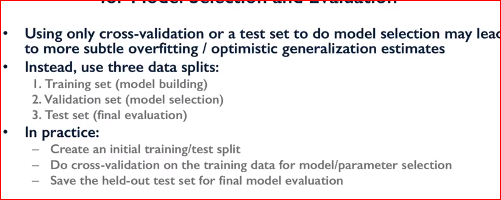

divide intitial  data into train, cross and test set then evaluate and then obtain submission file. 

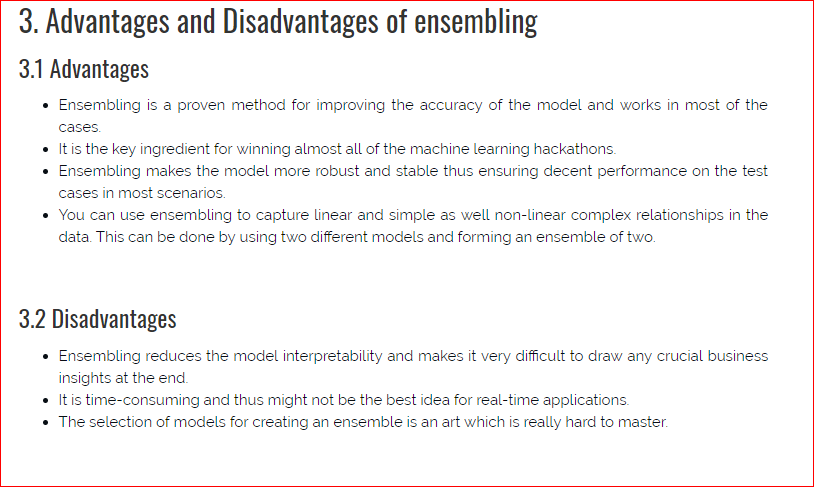

In [ ]:
Try feature engineering ensembling is not working that good here 